# Rhode Island Beach Profile Survey

In [2]:
# Set up workspace
import pandas as pd                                          # For data manipulation
from datetime import date                                    # For datetime object
import matplotlib.pyplot as plt                              # For plotting

## Load Data

In [49]:
# Load data
mst_df = pd.read_csv('~/Dev/DS_Projects/GSO/assets/mst.csv')
grh_df = pd.read_csv('~/Dev/DS_Projects/GSO/assets/grh.csv')
chatb_df = pd.read_csv('~/Dev/DS_Projects/GSO/assets/chatb.csv')
est2_df = pd.read_csv('~/Dev/DS_Projects/GSO/assets/est2.csv')
est1_df = pd.read_csv('~/Dev/DS_Projects/GSO/assets/est1.csv')
wkg_df = pd.read_csv('~/Dev/DS_Projects/GSO/assets/wkg.csv')
mis_df = pd.read_csv('~/Dev/DS_Projects/GSO/assets/mis.csv')

In [50]:
mis_df.describe()

,profile number,month,day,year,R0 (rispf Easting),R0 (rispf Northing),R0 (m NAVD88),profile azimuth,xy pairs,x1,...,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,7.060000e+02,706.000000,706.0,...,61.000000,36.000000,11.000000,4.000000,1.00,0.0,0.0,0.0,0.0,0.0
mean,353.526912,6.406516,15.975921,1996.560907,251545.648671,89125.621088,4.496585,1.691688e+02,8.041076,0.0,...,-3.635016,-3.909139,-3.772727,-3.541250,-3.95,NaN,NaN,NaN,NaN,NaN
std,203.994382,3.658921,8.539320,11.530649,2.388608,12.319964,0.181483,4.835116e-13,1.793530,0.0,...,0.702289,0.766151,0.384639,0.679355,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,1977.000000,251542.336000,89116.420883,4.218737,1.691688e+02,5.000000,0.0,...,-5.883000,-6.453000,-4.225000,-4.135000,-3.95,NaN,NaN,NaN,NaN,NaN
25%,177.250000,3.000000,9.000000,1987.000000,251542.500000,89116.420883,4.218737,1.691688e+02,7.000000,0.0,...,-3.980000,-4.260000,-4.077500,-4.030000,-3.95,NaN,NaN,NaN,NaN,NaN
50%,353.500000,6.000000,16.500000,1996.000000,251547.432180,89116.420883,4.628723,1.691688e+02,8.000000,0.0,...,-3.625000,-3.870000,-3.865000,-3.692500,-3.95,NaN,NaN,NaN,NaN,NaN
75%,529.750000,10.000000,23.000000,2007.000000,251547.432180,89142.200000,4.628723,1.691688e+02,9.000000,0.0,...,-3.140000,-3.461250,-3.492500,-3.203750,-3.95,NaN,NaN,NaN,NaN,NaN
max,707.000000,12.000000,31.000000,2017.000000,251547.432180,89142.200000,4.628723,1.691688e+02,15.000000,0.0,...,-1.935000,-2.305000,-3.035000,-2.645000,-3.95,NaN,NaN,NaN,NaN,NaN


## Create Timeseries

In [30]:
# transform_data() function
def transform_data(df):
    """Scales the survey y values by adding the product of -1 times the lowest y value to each
       y value
       
       Args:
           df: A dataframe that needs to be scaled
           
       Returns:
           transform_df: A dataframe containing the scaled y data
    """
    # For loop rowwize through each set of survey data
    for i in range(0, df.shape[0]):
        transform_df = pd.DataFrame(df)
        xy_pairs = transform_df.iloc[i, 9]      # xy_pairs is the number of y values to be evaluated
        low = transform_df.iloc[i, 30:(30 + xy_pairs)].min()
        # For loop columnwise through the y values
        for j in range(0, xy_pairs - 1):
            # Scale data
            transform_df.iloc[i, 30 + j] = transform_df.iloc[i, 30 + j] + abs(low)
    return transform_df

In [31]:
# Transform data sets
transform_mst_df = transform_data(mst_df)
transform_grh_df = transform_data(grh_df)
transform_chatb_df = transform_data(chatb_df)
transform_est2_df = transform_data(est2_df)
transform_est1_df = transform_data(est1_df)
transform_wkg_df = transform_data(wkg_df)
transform_mis_df = transform_data(mis_df)

In [32]:
# get_trap_area() function
def get_trap_area(b, h1, h2):
    """Implements the formula for the area of a trapezoid
    
       Args:
           b: A float that represents the base of the trapezoid
           h1: A float that represents the height of the first side of the trapezoid
           h2: A float that represents the height of the second side of the trapezoid
           
        Returns:
            a: A float that represents the area of the trapezoid
    """
    a = (1 / 2) * (h1 + h2) * b
    return a

In [33]:
# get_auc() function
def get_auc(xlist, ylist):
    """Calculates the area under the curve from the x and y survey data;
       Calls the get_trap_area() function
       
       Args:
           xlist: A list of x value survey data
           ylist: A list of y value survey data
           
       Returns:
           auc: A float that represents the area under the curve
    """
    auc = 0
    # For loop through xlist
    for i in range(0, len(xlist) - 1):
        # Set variables used in trapezoid auc formula
        base = xlist[(i + 1)] - xlist[i]      # base is the distance between x1 and x2
        height_1 = ylist[i]                   # height_1 is the y1 value
        height_2 = ylist[(i + 1)]             # height_2 is the y2 values
        # Call get_trap_area() with above variables
        area = get_trap_area(base, height_1, height_2)
        # Cumulative area
        auc += area
    return auc

In [34]:
# get_xyvals() function
def get_xyvals(df):
    """Creates timeseries data as lists of area under the curves and the dates the related surveys;
       Calls get_auc() function
    
    Args:
        df: A dataframe that contains xy pairs values in column 9, x values which start
            at column 10, and y values that start at column 30
            
    Returns:
        xvals: A list of datetime objects that represent survey dates
        yvals: A list of floats that represent AUC data
    """
    yvals = []
    xvals = []
    # For loop rowwise through dataframe
    for i in range(0, df.shape[0]):
        # xy_pairs is the number of x and y values that are to be pulled from df
        xy_pairs = df.iloc[i, 9]
        # Create lists of x and y survey values
        x_dist = df.iloc[i, 10:(10 + xy_pairs)]
        y_dist = df.iloc[i, 30:(30 + xy_pairs)]
        # Create lists of survey dates, xvals, and AUCs, yvals
        yvals.append(get_auc(x_dist, y_dist))                           # Calls get_auc() function
        xvals.append(date(df.iloc[i, 3], df.iloc[i, 1], df.iloc[i, 2])) # Converts dates to datetime objects
    return xvals, yvals

In [35]:
# Create mst_timeseries_df
mst_x, mst_y = get_xyvals(transform_mst_df)
mst_timeseries_df = pd.DataFrame(mst_x)
mst_timeseries_df.columns = ['Date']
mst_timeseries_df['AUC'] = mst_y
mst_timeseries_df = mst_timeseries_df.set_index('Date')
mst_timeseries_df.head(5)

,AUC
Date,
2013-12-20,65.27000
2017-01-13,116.26750
2017-02-01,74.80375
2017-02-22,113.06375
2017-03-17,100.65125


In [36]:
mst_timeseries_df.describe()

,AUC
count,983.000000
mean,104.853693
std,25.135714
min,15.991250
25%,88.481114
50%,105.159750
75%,121.452500
max,195.825000


In [37]:
# Create grh_timeseries_df
grh_x, grh_y = get_xyvals(transform_grh_df)
grh_timeseries_df = pd.DataFrame(grh_x)
grh_timeseries_df.columns = ['Date']
grh_timeseries_df['AUC'] = grh_y
grh_timeseries_df = grh_timeseries_df.set_index('Date')
grh_timeseries_df.head(5)

,AUC
Date,
1962-12-19,137.027324
1963-01-08,100.171308
1963-01-18,122.304584
1963-02-03,134.825623
1963-02-13,92.942275


In [38]:
grh_timeseries_df.describe()

,AUC
count,984.000000
mean,79.277404
std,31.862818
min,3.321000
25%,55.340000
50%,75.002500
75%,100.195936
max,198.174468


In [39]:
# Create chatb_timeseries_df
chatb_x, chatb_y = get_xyvals(transform_chatb_df)
chatb_timeseries_df = pd.DataFrame(chatb_x)
chatb_timeseries_df.columns = ['Date']
chatb_timeseries_df['AUC'] = chatb_y
chatb_timeseries_df = chatb_timeseries_df.set_index('Date')
chatb_timeseries_df.head(5)

,AUC
Date,
1975-11-20,75.262225
1975-12-05,110.497812
1975-12-24,57.394129
1976-01-07,55.219801
1976-01-26,63.648797


In [40]:
chatb_timeseries_df.describe()

,AUC
count,738.000000
mean,84.889190
std,21.640643
min,27.752500
25%,69.938750
50%,84.497318
75%,99.232500
max,154.730000


In [41]:
est2_x, est2_y = get_xyvals(transform_est2_df)
est2_timeseries_df = pd.DataFrame(est2_x)
est2_timeseries_df.columns = ['Date']
est2_timeseries_df['AUC'] = est2_y
est2_timeseries_df = est2_timeseries_df.set_index('Date')
est2_timeseries_df.head(5)

,AUC
Date,
1976-08-20,59.100074
1976-09-02,81.897262
1976-09-23,105.128164
1976-10-15,93.400257
1976-10-22,75.554534


In [42]:
est2_timeseries_df.describe()

,AUC
count,641.000000
mean,84.670816
std,26.752678
min,7.026250
25%,67.323750
50%,84.053750
75%,101.750000
max,168.660000


In [43]:
est1_x, est1_y = get_xyvals(transform_est1_df)
est1_timeseries_df = pd.DataFrame(est1_x)
est1_timeseries_df.columns = ['Date']
est1_timeseries_df['AUC'] = est1_y
est1_timeseries_df = est1_timeseries_df.set_index('Date')
est1_timeseries_df.head(5)

,AUC
Date,
1962-12-19,98.939125
1963-01-08,39.231539
1963-01-18,85.111611
1963-02-03,107.458037
1963-02-13,65.708800


In [44]:
est1_timeseries_df.describe()

,AUC
count,966.000000
mean,95.256937
std,34.446271
min,14.696499
25%,68.533794
50%,92.927500
75%,120.434063
max,195.160000


In [45]:
wkg_x, wkg_y = get_xyvals(transform_wkg_df)
wkg_timeseries_df = pd.DataFrame(wkg_x)
wkg_timeseries_df.columns = ['Date']
wkg_timeseries_df['AUC'] = wkg_y
wkg_timeseries_df = wkg_timeseries_df.set_index('Date')
wkg_timeseries_df.head(5)

,AUC
Date,
2013-12-20,65.27000
2017-01-13,116.26750
2017-02-01,74.80375
2017-02-22,113.06375
2017-03-17,100.65125


In [46]:
wkg_timeseries_df.describe()

,AUC
count,983.000000
mean,104.853693
std,25.135714
min,15.991250
25%,88.481114
50%,105.159750
75%,121.452500
max,195.825000


In [47]:
mis_x, mis_y = get_xyvals(transform_mis_df)
mis_timeseries_df = pd.DataFrame(mis_x)
mis_timeseries_df.columns = ['Date']
mis_timeseries_df['AUC'] = mis_y
mis_timeseries_df = mis_timeseries_df.set_index('Date')
mis_timeseries_df.head(5)

,AUC
Date,
1977-07-26,48.438699
1977-08-11,46.586747
1977-08-24,68.175527
1977-09-13,47.957892
1977-10-06,29.998134


In [48]:
mis_timeseries_df.describe()

,AUC
count,706.000000
mean,60.295421
std,23.349467
min,-47.352250
25%,43.808750
50%,57.757500
75%,75.422500
max,132.375000


## Plot Data

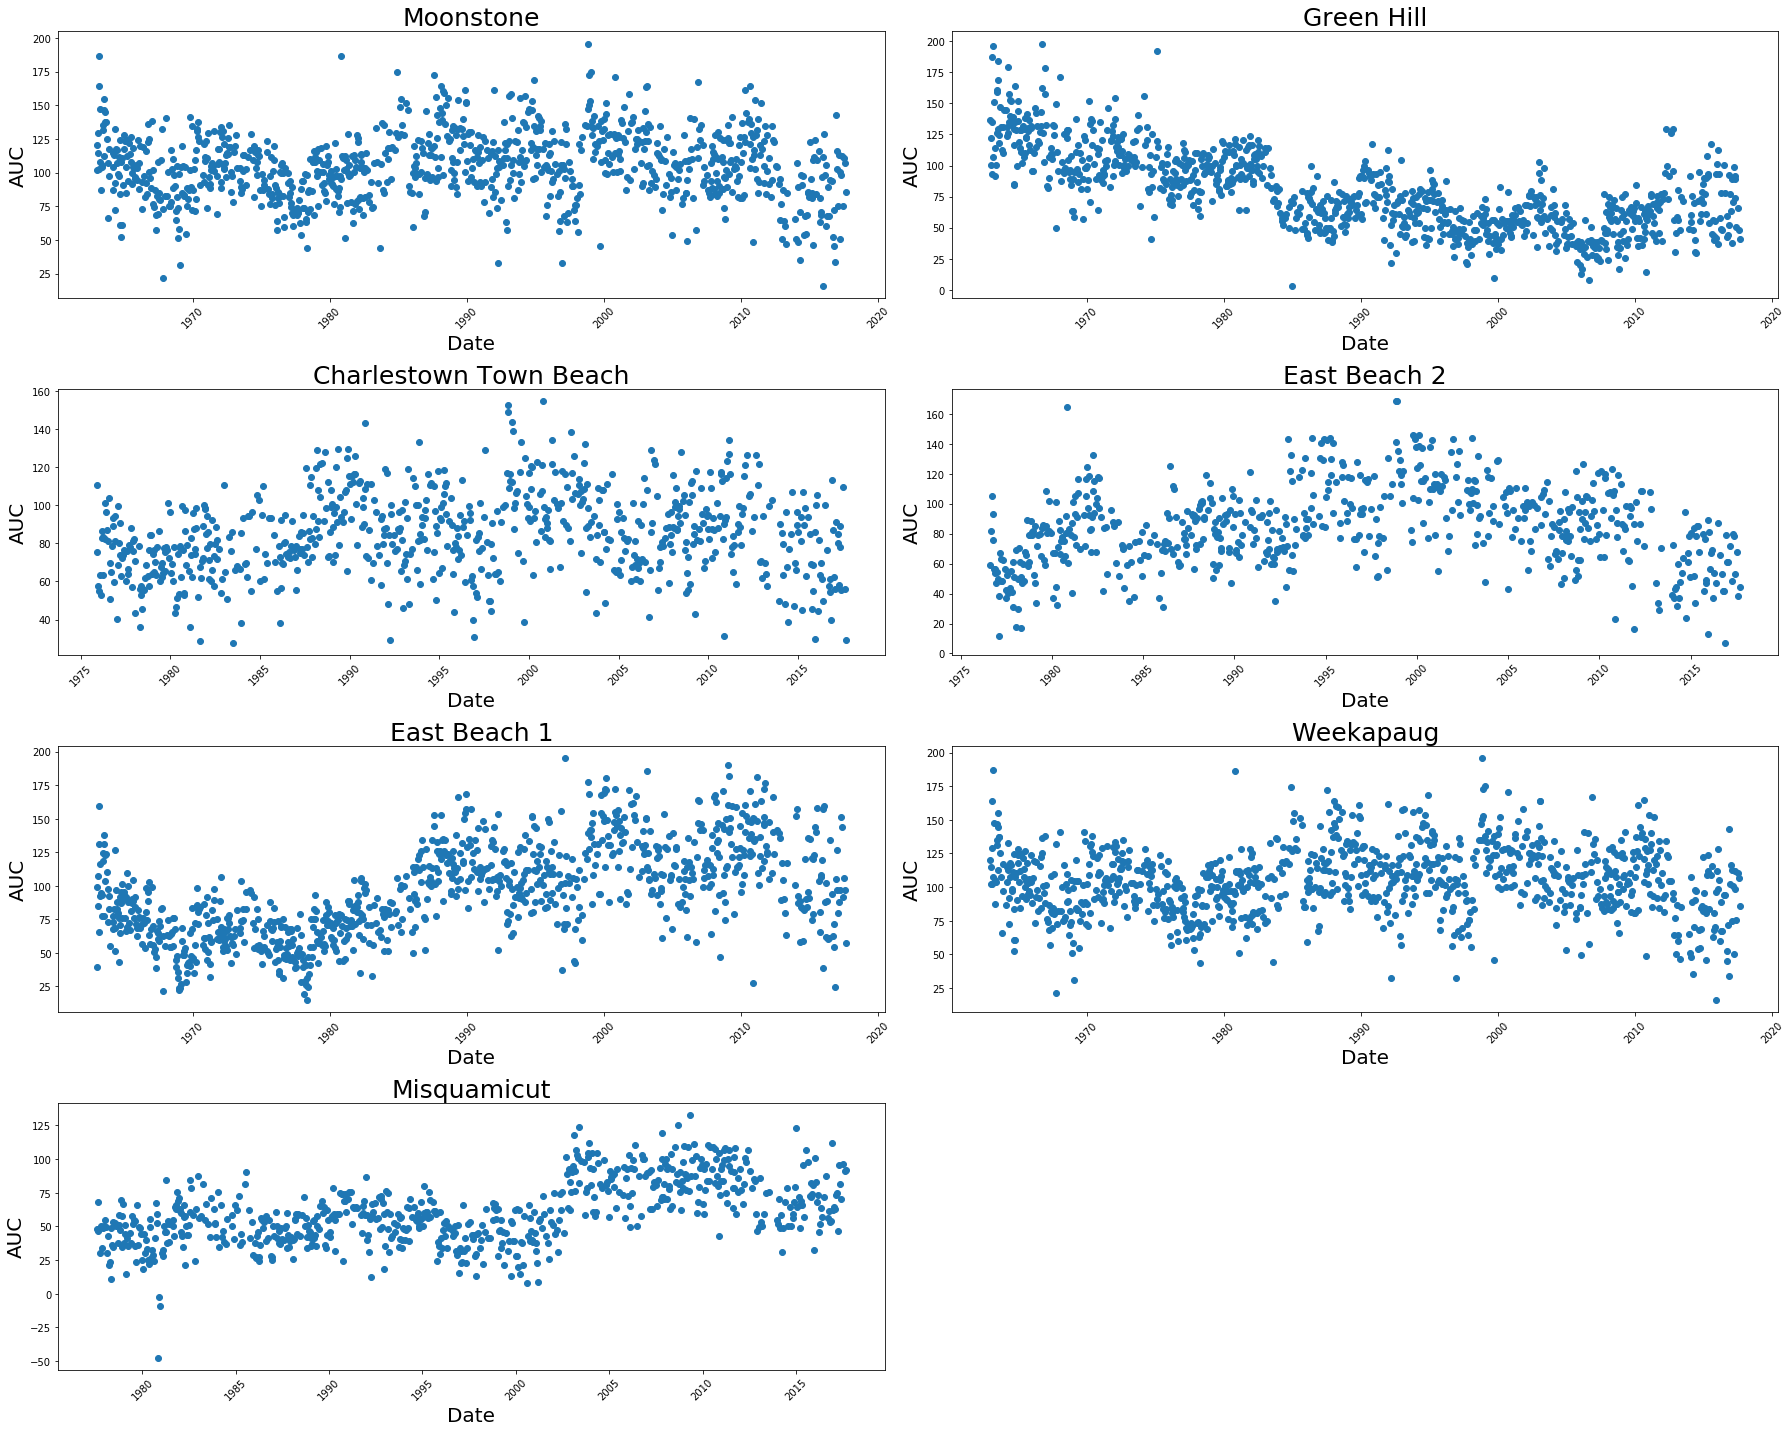

In [17]:
# Scatter plots of each timeseries
f = plt.figure(figsize=(25,20))

# mst plot
ax = f.add_subplot(421)
plt.scatter(mst_timeseries_df.index, mst_timeseries_df['AUC'])
plt.title('Moonstone', size=25)
plt.xlabel('Date', size=20)
plt.xticks(rotation=45)
plt.ylabel('AUC', size=20)

# grh plot
ax1 = f.add_subplot(422)
plt.scatter(grh_timeseries_df.index, grh_timeseries_df['AUC'])
plt.title('Green Hill', size=25)
plt.xlabel('Date', size=20)
plt.xticks(rotation=45)
plt.ylabel('AUC', size=20)

# chatb
ax2 = f.add_subplot(423)
plt.scatter(chatb_timeseries_df.index, chatb_timeseries_df['AUC'])
plt.title('Charlestown Town Beach', size=25)
plt.xlabel('Date', size=20)
plt.xticks(rotation=45)
plt.ylabel('AUC', size=20)

# est2 plot
ax3 = f.add_subplot(424)
plt.scatter(est2_timeseries_df.index, est2_timeseries_df['AUC'])
plt.title('East Beach 2', size=25)
plt.xlabel('Date', size=20)
plt.xticks(rotation=45)
plt.ylabel('AUC', size=20)

# est1 plot
ax4 = f.add_subplot(425)
plt.scatter(est1_timeseries_df.index, est1_timeseries_df['AUC'])
plt.title('East Beach 1', size=25)
plt.xlabel('Date', size=20)
plt.xticks(rotation=45)
plt.ylabel('AUC', size=20)

# wkg plot
ax5 = f.add_subplot(426)
plt.scatter(wkg_timeseries_df.index, wkg_timeseries_df['AUC'])
plt.title('Weekapaug', size=25)
plt.xlabel('Date', size=20)
plt.xticks(rotation=45)
plt.ylabel('AUC', size=20)

# mis plot
ax6 = f.add_subplot(427)
plt.scatter(mis_timeseries_df.index, mis_timeseries_df['AUC'])
plt.title('Misquamicut', size=25)
plt.xlabel('Date', size=20)
plt.xticks(rotation=45)
plt.ylabel('AUC', size=20)

plt.tight_layout()